# Working with graphs (Part 1)
Visualization

In [1]:
## Import modules and libraries
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph, pickNode
from traversals.strategies import sumTrees, UniformRandomSampleForest

## Import an apropriate layout (graphviz)

In [11]:
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nt

## Pick a node from the Tree of Life

In [3]:
bats = pickNode(Order,'Chiropt')

## Get some (not all) cells and obtain the subtree

In [4]:
trees = bats.getAssociatedTrees(first_n_cells=10)

INFO Retrieving cells
INFO:biospytial.graph_models:Retrieving cells
INFO Done!
INFO:biospytial.graph_models:Done!
INFO Retriving Occurrences
INFO:biospytial.graph_models:Retriving Occurrences


In [5]:
trees = list(trees)

## Obtain a folded tree

In [6]:
bt = reduce(lambda a,b :a+b ,trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


## Convert to a "Graph" instance to analyse

In [7]:
graph_trees = map(lambda t : t.toNetworkx(),trees)

## Convert the "big tree" to a Network instance

In [8]:
gt = bt.toNetworkx()

In [9]:
pos =  graphviz_layout(gt,prog='circo',root='LUCA')

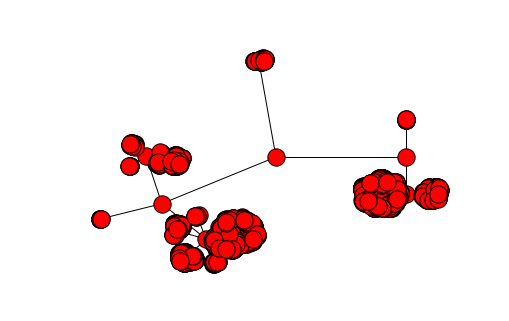

In [12]:
nt.draw(gt,pos)